# 原始数据的分割线确定-比例差异最大化

In [1]:
import pandas as pd
import numpy as np

# real_data = pd.read_csv('../week_3/data/df_real_data.csv')
# rumor_data = pd.read_csv('../week_3/data/df_rumor_data.csv')
# real_data.head()
user_real_count = pd.read_csv('data/user_count_real.csv')
user_rumor_count = pd.read_csv('data/user_count_rumor.csv')
user_rumor_count.head()

,Unnamed: 0,user_id,friends_count,repostNum,followers_count,weiboID
0,0,5269634098,160,7,75,3950696707151772
1,1,5559568190,5,285,66843,3949660958003450
2,2,1692637037,338,0,262,3950515929249677
3,3,2211424651,215,0,13,3950512342047569
4,4,2145377515,41,0,2259,3950485830376193


In [2]:
print('T :', user_real_count.shape)
print('LT:', user_real_count[user_real_count['repostNum']<10].shape)
print('HT:', user_real_count[user_real_count['repostNum']>=10].shape)
print('HLT:', user_real_count[user_real_count['repostNum']<10][user_real_count['followers_count']>=1000].shape)
print('HHT:', user_real_count[user_real_count['repostNum']>=10][user_real_count['followers_count']>=1000].shape)
print('F:', user_rumor_count.shape)
print('LF:', user_rumor_count[user_rumor_count['repostNum']<10].shape)
print('HF:', user_rumor_count[user_rumor_count['repostNum']>=10].shape)
print('HLF:', user_rumor_count[user_rumor_count['repostNum']<10][user_rumor_count['followers_count']>=1000].shape)
print('LHF:', user_rumor_count[user_rumor_count['repostNum']>=10][user_rumor_count['followers_count']<1000].shape)

T : (10000, 6)
LT: (8255, 6)
HT: (1745, 6)
HLT: (7867, 6)
HHT: (1709, 6)
F: (22479, 6)
LF: (16318, 6)
HF: (6161, 6)
HLF: (3513, 6)
LHF: (1397, 6)


C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [3]:
# import ast

# real_data['authorDic'] =  real_data['authorDic'].apply(lambda s: ast.literal_eval(s))
# real_data['text'] = real_data['authorDic'].apply(lambda d: d['weiboText'])
# real_data['repostNum'] = real_data['authorDic'].apply(lambda d: d['repostNum'])

# rumor_data['authorDic'] =  rumor_data['authorDic'].apply(lambda s: ast.literal_eval(s))
# rumor_data['text'] = rumor_data['authorDic'].apply(lambda d: d['weiboText'])
# rumor_data['repostNum'] = rumor_data['authorDic'].apply(lambda d: d['repostNum'])
# real_data['followers_count'] = real_data['authorDic'].apply(lambda d: d['followers_count'])
# rumor_data['followers_count'] = rumor_data['authorDic'].apply(lambda d: d['followers_count'])

In [3]:
real_data_1 = user_real_count[['repostNum', 'followers_count']]
rumor_data_1 = user_rumor_count[['repostNum', 'followers_count']]

In [4]:
r_list = []
p_list = []
for i in range(1,9):
    for j in range(1,5):
        real_1 = user_real_count[real_data_1['repostNum']<j][user_real_count['followers_count']<i]
        real_2 = user_real_count[real_data_1['repostNum']>=10**j][user_real_count['followers_count']<10**i]
        real_3 = user_real_count[real_data_1['repostNum']>=j][user_real_count['followers_count']>=i]
        real_4 = user_real_count[real_data_1['repostNum']<10**j][user_real_count['followers_count']>=10**i]
        rumor_1 = user_rumor_count[user_rumor_count['repostNum']<j][user_rumor_count['followers_count']<i]
        rumor_2 = user_rumor_count[user_rumor_count['repostNum']>=10**j][user_rumor_count['followers_count']<10**i]
        rumor_3 = user_rumor_count[user_rumor_count['repostNum']>=j][user_rumor_count['followers_count']>=i]
        rumor_4 = user_rumor_count[user_rumor_count['repostNum']<10**j][user_rumor_count['followers_count']>=10**i]
        P_real_1 = real_1.shape[0]/user_real_count.shape[0]
        P_real_2 = real_2.shape[0]/user_real_count.shape[0]
        P_real_3 = real_3.shape[0]/user_real_count.shape[0]
        P_real_4 = real_4.shape[0]/user_real_count.shape[0]
        P_rumor_1 = rumor_1.shape[0]/user_rumor_count.shape[0]
        P_rumor_2 = rumor_2.shape[0]/user_rumor_count.shape[0]
        P_rumor_3 = rumor_3.shape[0]/user_rumor_count.shape[0]
        P_rumor_4 = rumor_4.shape[0]/user_rumor_count.shape[0]
        r = (P_rumor_2 - P_real_2) + (P_real_4 - P_rumor_4) - abs(P_rumor_1 - P_real_1) - abs(P_rumor_3 - P_real_3)
        r_list.append(r)
        p_list.append((i,j))

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  #

In [6]:
import matplotlib.pyplot as plt
import numpy as np

font1 = {
    'weight': 'normal',
    'size' : 18
}
fig, ax = plt.subplots()
# plt.style.use('seaborn-white')
plt.plot(np.arange(0,32), r_list, marker='o', color='#58a6a6', markerfacecolor='#58a6a6', markeredgecolor='white', linewidth=3, markersize=10)
# plt.annotate(r'$(1000,10)$',xy=(8,max(r_list)),xytext=(20,0.6), arrowprops=dict(facecolor='black', shrink=0.05, width=2))
plt.xlabel('Tuple', font1, color='black')
plt.ylabel('Difference', font1, color='black')
plt.tick_params(labelsize=14, colors='black')
plt.tight_layout()
plt.savefig('images/diff.pdf')
plt.savefig('images/diff.jpg', dpi=600)
plt.show()

<Figure size 640x480 with 1 Axes>

In [55]:
max(r_list)

0.6549477067485208

In [56]:
r_list

[0.12861745184394316,
 0.06590046265403267,
 -0.009289047555496234,
 -0.03525633702566829,
 0.3454568085768939,
 0.2833626228924773,
 0.20781722496552335,
 0.18176096356599492,
 0.6549477067485208,
 0.5947219315805865,
 0.5184647582187819,
 0.49223055296054097,
 0.5823923128253037,
 0.5223224253747941,
 0.4459762800836337,
 0.41974207482539266,
 0.39021246496730294,
 0.3306764090929311,
 0.2541523199430579,
 0.22791811468481693,
 0.20864646114150992,
 0.14973320877263224,
 0.073209119622759,
 0.04679697050580542,
 0.09320477334401,
 0.03518124026869521,
 -0.04152079273989056,
 -0.06819985764491304,
 0.041546643533965144,
 -0.01532025445971797,
 -0.09220023132701632,
 -0.11923518394946395]

In [57]:
# import pandas as pd
# import numpy as np

# user_real_count = pd.read_csv('data/user_count_real.csv')
# user_rumor_count = pd.read_csv('data/user_count_rumor.csv')
# user_rumor_count.head()

In [15]:
x_real = user_real_count['followers_count']
y_real = user_real_count['repostNum']
x_rumor = user_rumor_count['followers_count']
y_rumor = user_rumor_count['repostNum']

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


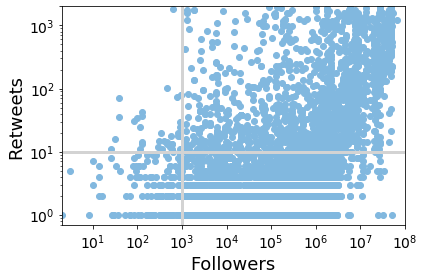

In [15]:
# plt.style.use('ggplot')
fig, ax1= plt.subplots()
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.plot(user_real_count['followers_count'], user_real_count['repostNum'], 'o', color='#81B8DF')
ax1.set_xticks([0,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8])
ax1.set_yticks([1e0,1e1,1e2,1e3,2000])
ax1.set_xlim(0, 10**8)
ax1.set_ylim(0, 2000)
ax1.tick_params(labelsize=14, colors='black')
plt.axhline(y=1e1, lw=3, c='lightgrey')
plt.axvline(x=1e3, lw=3, c='lightgrey')
plt.xlabel('Followers', font1, color='black')
plt.ylabel('Retweets', font1, color='black')
plt.tight_layout()
plt.savefig('images/true_news.pdf')
plt.savefig('images/true_news.jpg', dpi=600)
plt.show()

C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  
C:\Users\ChuAI\Anaconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  if __name__ == '__main__':


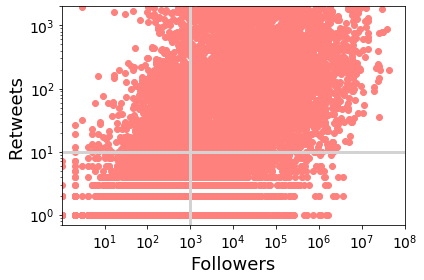

In [14]:
# plt.style.use('ggplot')
fig, ax2= plt.subplots()
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.plot(user_rumor_count['followers_count'], user_rumor_count['repostNum'], 'o',color='#FE817D')
ax2.set_xticks([0,1e1,1e2,1e3,1e4,1e5,1e6,1e7,1e8])
ax2.set_yticks([1e0,1e1,1e2,1e3,2000])
ax2.set_xlim(0, 10**8)
ax2.set_ylim(0, 2000)
ax2.tick_params(labelsize=14, colors='black')
plt.axhline(y=1e1, lw=3, c='lightgrey')
plt.axvline(x=1e3, lw=3, c='lightgrey')
plt.xlabel('Followers', font1, color='black')
plt.ylabel('Retweets', font1, color='black')
plt.tight_layout()
plt.savefig('images/fake_news.pdf')
plt.savefig('images/fake_news.jpg', dpi=600)
plt.show()